In [1]:
import numpy as np
import matplotlib.pyplot as plt

# load PerCX functions
import sys
sys.path.append('../src/percx/')
from percx import *

Define idealized temperature time series

In [2]:
# 200yr linear ramp-up followed by 1800yr stabilization at 3°C
dT = np.zeros([7,2000])
dT[0,:] = np.append(np.linspace(0,2,100),np.linspace(2,2,1900))
dT[1,:] = np.append(np.linspace(0,4,200),np.linspace(4,4,1800))
dT[2,:] = np.append(np.append(np.append(np.linspace(0,2,100),np.linspace(2,2,200)),np.linspace(2,0,100)),np.linspace(0,0,1600))
dT[3,:] = np.append(np.append(np.append(np.linspace(0,2,100),np.linspace(2,2,500)),np.linspace(2,0,100)),np.linspace(0,0,1300))
dT[4,:] = np.append(np.append(np.append(np.linspace(0,4,200),np.linspace(4,4,200)),np.linspace(4,0,200)),np.linspace(0,0,1400))
dT[5,:] = np.append(np.append(np.append(np.linspace(0,4,200),np.linspace(4,4,500)),np.linspace(4,0,200)),np.linspace(0,0,1100))
dT[6,:] = np.append(np.append(np.append(np.linspace(0,4,200),np.linspace(4,4,500)),np.linspace(4,2,100)),np.linspace(2,2,1200))
time = np.arange(0, len(dT[0,:]))

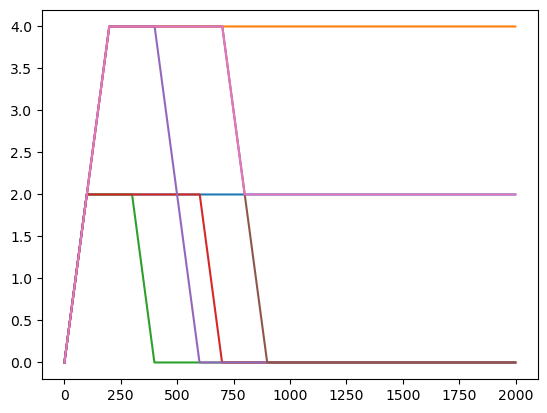

In [3]:
plt.plot(dT[0,:])
plt.plot(dT[1,:])
plt.plot(dT[2,:])
plt.plot(dT[3,:])
plt.plot(dT[4,:])
plt.plot(dT[5,:])
plt.plot(dT[6,:])

Read PerCX valid parameter combinations

In [4]:
PerCX_params = np.loadtxt("../input/PerCX_valid_params_CMIP6_ssp245.txt", skiprows=1)

Define initial permafrost carbon pool size

In [5]:
C_init = 1400

Calculate carbon loss

In [6]:
C_CO2_params = np.zeros([dT.shape[0],np.array(PerCX_params).shape[0], len(time)])
C_CH4_params = np.zeros([dT.shape[0],np.array(PerCX_params).shape[0], len(time)])

for sc in np.arange(0,dT.shape[0]):

    # Loop through parameters
    for pidx in np.arange(0,np.array(PerCX_params).shape[0]):
        A_CO2, A_CH4, tau, decay = np.array(PerCX_params)[pidx,:]

        # Compute carbon loss
        C_CO2_params[sc,pidx,:], C_CH4_params[sc,pidx,:] = PFC_species_response(dT[sc,:], time, A_CO2, A_CH4, tau, C_init, decay)

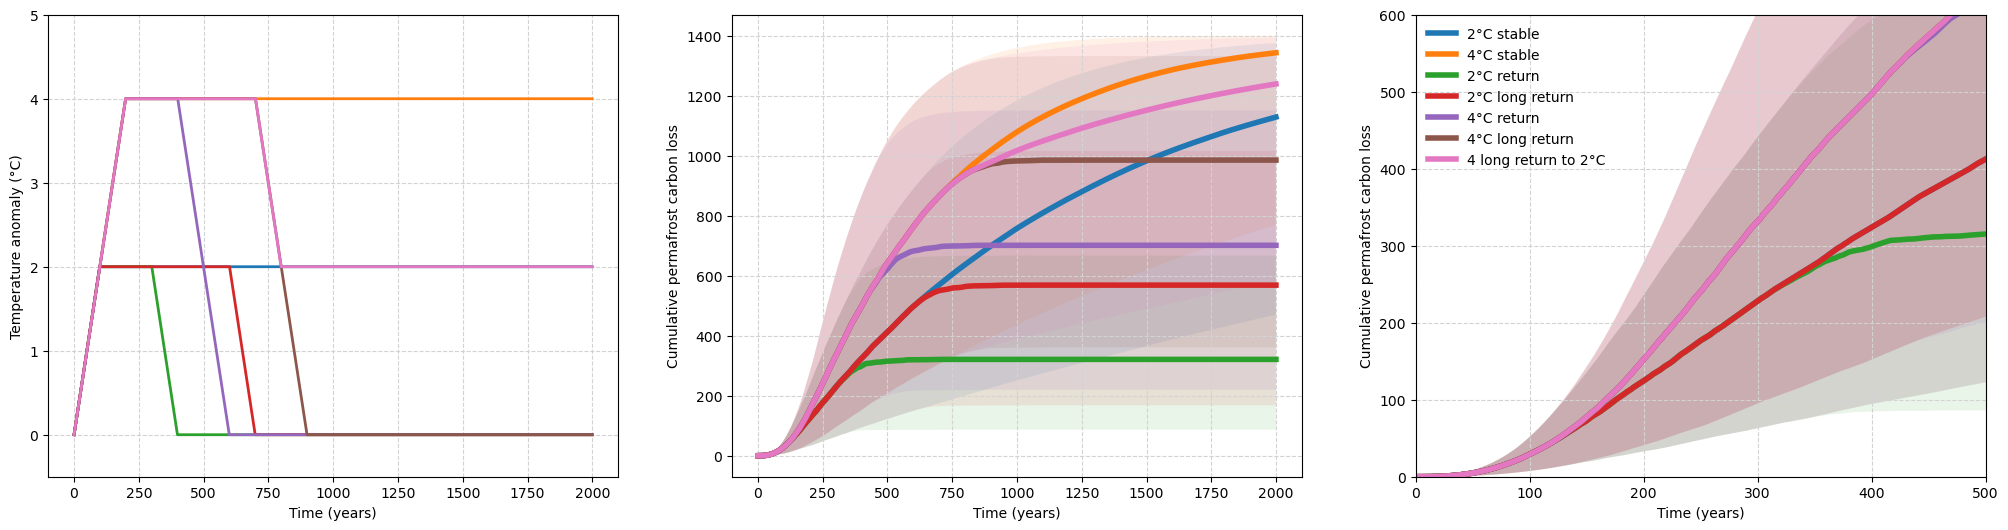

In [15]:
sccolors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',"tab:pink"]
sctiles=["2°C stable","4°C stable","2°C return","2°C long return","4°C return","4°C long return","4 long return to 2°C"]

fig, ax = plt.subplots(1,3,figsize=(25, 6))

ax[0].set_ylim(-0.5,5)
for sc in np.arange(0,dT.shape[0]):
    ax[0].plot(time, dT[sc,:], color=sccolors[sc], lw=2, label=sctiles[sc])
ax[0].set_xlabel('Time (years)')
ax[0].set_ylabel('Temperature anomaly (°C)')
#ax[0].legend(loc='upper left', frameon=False, ncol=3)   
ax[0].grid(color='lightgrey', linestyle='--')

for sc in np.arange(0,dT.shape[0]):
    ax[1].fill_between(time, np.nanpercentile(np.cumsum(C_CO2_params[sc,:,:] + C_CH4_params[sc,:,:],1),5,0), np.nanpercentile(np.cumsum(C_CO2_params[sc,:,:] + C_CH4_params[sc,:,:],1),95,0), color=sccolors[sc], alpha=0.1, edgecolor="none")
    ax[1].plot(time, np.nanpercentile(np.cumsum(C_CO2_params[sc,:,:] + C_CH4_params[sc,:,:],1),50,0), color=sccolors[sc], lw=4, label=sctiles[sc])
ax[1].set_xlabel('Time (years)')
ax[1].set_ylabel('Cumulative permafrost carbon loss')
#ax[1].legend(loc='upper left', frameon=False)
ax[1].grid(color='lightgrey', linestyle='--')

ax[2].set_ylim(0,600)
ax[2].set_xlim(0,500)
for sc in np.arange(0,dT.shape[0]):
    ax[2].fill_between(time, np.nanpercentile(np.cumsum(C_CO2_params[sc,:,:] + C_CH4_params[sc,:,:],1),5,0), np.nanpercentile(np.cumsum(C_CO2_params[sc,:,:] + C_CH4_params[sc,:,:],1),95,0), color=sccolors[sc], alpha=0.1, edgecolor="none")
    ax[2].plot(time, np.nanpercentile(np.cumsum(C_CO2_params[sc,:,:] + C_CH4_params[sc,:,:],1),50,0), color=sccolors[sc], lw=4, label=sctiles[sc])
ax[2].set_xlabel('Time (years)')
ax[2].set_ylabel('Cumulative permafrost carbon loss')
ax[2].legend(loc='upper left', frameon=False)
ax[2].grid(color='lightgrey', linestyle='--')

